# Analyze all the results generated by the experiments
After each of the experiments have been run, this notebook computes results and formats them into charts and tables for publication or analysis.

## Imports

In [79]:
import os
import re
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Experiment 1: Scene Recognition

## Compute Dataframe

In [44]:
scene_recognition_filepath = '../../results/exp1a_scene_recognition'

vision_dict = {'rn50': 'ResNet50',
               'vitb32': 'ViT-B/32',
               'vitl14': 'ViT-L/14',
               'basic': 'Basic',
               'detailed': 'Detailed'}

results_columns = ['Vision Backbone','Scene Description','Method','Number of Updates','Accuracy']
scene_recognition_results_df = pd.DataFrame(columns = results_columns)

for _, _, cfg_files in os.walk(scene_recognition_filepath):
    for cfg_file in cfg_files:
        print(cfg_file)

        # Get detailed names for results dataframe
        x = re.search('scene_results_(.+?)_(.+?).csv',cfg_file)
        vision_backbone_key = x.group(1)
        vision_description_key = x.group(2)
        vision_backbone = vision_dict[vision_backbone_key]
        vision_description = vision_dict[vision_description_key]
        
        results_df = pd.read_csv(os.path.join(scene_recognition_filepath, cfg_file),index_col=0)
    
        audio_1_df = results_df[(results_df['scene_estimation_mode']=='audio') & (results_df['n_audio_updates']==1)]
        audio_1_true_pos_df = results_df[(results_df['scene_estimation_mode']=='audio') & (results_df['n_audio_updates']==1) & (results_df['scene_est']==results_df['scene'])]
        audio_2_df = results_df[(results_df['scene_estimation_mode']=='audio') & (results_df['n_audio_updates']==2)]
        audio_2_true_pos_df = results_df[(results_df['scene_estimation_mode']=='audio') & (results_df['n_audio_updates']==2) & (results_df['scene_est']==results_df['scene'])]
        audio_3_df = results_df[(results_df['scene_estimation_mode']=='audio') & (results_df['n_audio_updates']==3)]
        audio_3_true_pos_df = results_df[(results_df['scene_estimation_mode']=='audio') & (results_df['n_audio_updates']==3) & (results_df['scene_est']==results_df['scene'])]
        audio_4_df = results_df[(results_df['scene_estimation_mode']=='audio') & (results_df['n_audio_updates']==4)]
        audio_4_true_pos_df = results_df[(results_df['scene_estimation_mode']=='audio') & (results_df['n_audio_updates']==4) & (results_df['scene_est']==results_df['scene'])]
        audio_5_df = results_df[(results_df['scene_estimation_mode']=='audio') & (results_df['n_audio_updates']==5)]
        audio_5_true_pos_df = results_df[(results_df['scene_estimation_mode']=='audio') & (results_df['n_audio_updates']==5) & (results_df['scene_est']==results_df['scene'])]
        audio_6_df = results_df[(results_df['scene_estimation_mode']=='audio') & (results_df['n_audio_updates']==6)]
        audio_6_true_pos_df = results_df[(results_df['scene_estimation_mode']=='audio') & (results_df['n_audio_updates']==6) & (results_df['scene_est']==results_df['scene'])]
    
        clip_1_df = results_df[(results_df['scene_estimation_mode']=='clip') & (results_df['n_visual_updates']==1)]
        clip_1_true_pos_df = results_df[(results_df['scene_estimation_mode']=='clip') & (results_df['n_visual_updates']==1) & (results_df['scene_est']==results_df['scene'])]
        clip_2_df = results_df[(results_df['scene_estimation_mode']=='clip') & (results_df['n_visual_updates']==2)]
        clip_2_true_pos_df = results_df[(results_df['scene_estimation_mode']=='clip') & (results_df['n_visual_updates']==2) & (results_df['scene_est']==results_df['scene'])]
        clip_3_df = results_df[(results_df['scene_estimation_mode']=='clip') & (results_df['n_visual_updates']==3)]
        clip_3_true_pos_df = results_df[(results_df['scene_estimation_mode']=='clip') & (results_df['n_visual_updates']==3) & (results_df['scene_est']==results_df['scene'])]
        clip_4_df = results_df[(results_df['scene_estimation_mode']=='clip') & (results_df['n_visual_updates']==4)]
        clip_4_true_pos_df = results_df[(results_df['scene_estimation_mode']=='clip') & (results_df['n_visual_updates']==4) & (results_df['scene_est']==results_df['scene'])]
        clip_5_df = results_df[(results_df['scene_estimation_mode']=='clip') & (results_df['n_visual_updates']==5)]
        clip_5_true_pos_df = results_df[(results_df['scene_estimation_mode']=='clip') & (results_df['n_visual_updates']==5) & (results_df['scene_est']==results_df['scene'])]
        clip_6_df = results_df[(results_df['scene_estimation_mode']=='clip') & (results_df['n_visual_updates']==6)]
        clip_6_true_pos_df = results_df[(results_df['scene_estimation_mode']=='clip') & (results_df['n_visual_updates']==6) & (results_df['scene_est']==results_df['scene'])]
    
        fused_2_df = results_df[(results_df['scene_estimation_mode']=='fused') & (results_df['n_visual_updates']==1) & (results_df['n_audio_updates']==1)]
        fused_2_true_pos_df = results_df[(results_df['scene_estimation_mode']=='fused') & (results_df['n_visual_updates']==1) & (results_df['n_audio_updates']==1) & (results_df['scene_est']==results_df['scene'])]
        fused_4_df = results_df[(results_df['scene_estimation_mode']=='fused') & (results_df['n_visual_updates']==2) & (results_df['n_audio_updates']==2)]
        fused_4_true_pos_df = results_df[(results_df['scene_estimation_mode']=='fused') & (results_df['n_visual_updates']==2) & (results_df['n_audio_updates']==2) & (results_df['scene_est']==results_df['scene'])]
        fused_6_df = results_df[(results_df['scene_estimation_mode']=='fused') & (results_df['n_visual_updates']==3) & (results_df['n_audio_updates']==3)]
        fused_6_true_pos_df = results_df[(results_df['scene_estimation_mode']=='fused') & (results_df['n_visual_updates']==3) & (results_df['n_audio_updates']==3) & (results_df['scene_est']==results_df['scene'])]

        audio_1_acc = float(audio_1_true_pos_df.shape[0]/audio_1_df.shape[0])
        audio_2_acc = float(audio_2_true_pos_df.shape[0]/audio_2_df.shape[0])
        audio_3_acc = float(audio_3_true_pos_df.shape[0]/audio_3_df.shape[0])
        audio_4_acc = float(audio_4_true_pos_df.shape[0]/audio_4_df.shape[0])
        audio_5_acc = float(audio_5_true_pos_df.shape[0]/audio_5_df.shape[0])
        audio_6_acc = float(audio_6_true_pos_df.shape[0]/audio_6_df.shape[0])

        vis_1_acc = float(clip_1_true_pos_df.shape[0]/clip_1_df.shape[0])
        vis_2_acc = float(clip_2_true_pos_df.shape[0]/clip_2_df.shape[0])
        vis_3_acc = float(clip_3_true_pos_df.shape[0]/clip_3_df.shape[0])
        vis_4_acc = float(clip_4_true_pos_df.shape[0]/clip_4_df.shape[0])
        vis_5_acc = float(clip_5_true_pos_df.shape[0]/clip_5_df.shape[0])
        vis_6_acc = float(clip_6_true_pos_df.shape[0]/clip_6_df.shape[0])
        
        fused_2_acc = float(fused_2_true_pos_df.shape[0]/fused_2_df.shape[0])
        fused_4_acc = float(fused_4_true_pos_df.shape[0]/fused_4_df.shape[0])
        fused_6_acc = float(fused_6_true_pos_df.shape[0]/fused_6_df.shape[0])
        
        # Add rows to results dataframe ['Vision Backbone','Scene Description','Method','Number of Updates','Vision Accuracy']
        config_results_df = pd.DataFrame([[vision_backbone, vision_description, 'audio', 1, audio_1_acc]],columns = results_columns)
        scene_recognition_results_df = pd.concat((scene_recognition_results_df,config_results_df), ignore_index=True)
        config_results_df = pd.DataFrame([[vision_backbone, vision_description, 'audio', 2, audio_2_acc]],columns = results_columns)
        scene_recognition_results_df = pd.concat((scene_recognition_results_df,config_results_df), ignore_index=True)
        config_results_df = pd.DataFrame([[vision_backbone, vision_description, 'audio', 3, audio_3_acc]],columns = results_columns)
        scene_recognition_results_df = pd.concat((scene_recognition_results_df,config_results_df), ignore_index=True)
        config_results_df = pd.DataFrame([[vision_backbone, vision_description, 'audio', 4, audio_4_acc]],columns = results_columns)
        scene_recognition_results_df = pd.concat((scene_recognition_results_df,config_results_df), ignore_index=True)
        config_results_df = pd.DataFrame([[vision_backbone, vision_description, 'audio', 5, audio_5_acc]],columns = results_columns)
        scene_recognition_results_df = pd.concat((scene_recognition_results_df,config_results_df), ignore_index=True)
        config_results_df = pd.DataFrame([[vision_backbone, vision_description, 'audio', 6, audio_6_acc]],columns = results_columns)
        scene_recognition_results_df = pd.concat((scene_recognition_results_df,config_results_df), ignore_index=True)
        
        config_results_df = pd.DataFrame([[vision_backbone, vision_description, 'visual', 1, vis_1_acc]],columns = results_columns)
        scene_recognition_results_df = pd.concat((scene_recognition_results_df,config_results_df), ignore_index=True)
        config_results_df = pd.DataFrame([[vision_backbone, vision_description, 'visual', 2, vis_2_acc]],columns = results_columns)
        scene_recognition_results_df = pd.concat((scene_recognition_results_df,config_results_df), ignore_index=True)
        config_results_df = pd.DataFrame([[vision_backbone, vision_description, 'visual', 3, vis_3_acc]],columns = results_columns)
        scene_recognition_results_df = pd.concat((scene_recognition_results_df,config_results_df), ignore_index=True)
        config_results_df = pd.DataFrame([[vision_backbone, vision_description, 'visual', 4, vis_4_acc]],columns = results_columns)
        scene_recognition_results_df = pd.concat((scene_recognition_results_df,config_results_df), ignore_index=True)
        config_results_df = pd.DataFrame([[vision_backbone, vision_description, 'visual', 5, vis_5_acc]],columns = results_columns)
        scene_recognition_results_df = pd.concat((scene_recognition_results_df,config_results_df), ignore_index=True)
        config_results_df = pd.DataFrame([[vision_backbone, vision_description, 'visual', 6, vis_6_acc]],columns = results_columns)
        scene_recognition_results_df = pd.concat((scene_recognition_results_df,config_results_df), ignore_index=True)

        config_results_df = pd.DataFrame([[vision_backbone, vision_description, 'fused', 2, fused_2_acc]],columns = results_columns)
        scene_recognition_results_df = pd.concat((scene_recognition_results_df,config_results_df), ignore_index=True)
        config_results_df = pd.DataFrame([[vision_backbone, vision_description, 'fused', 4, fused_4_acc]],columns = results_columns)
        scene_recognition_results_df = pd.concat((scene_recognition_results_df,config_results_df), ignore_index=True)
        config_results_df = pd.DataFrame([[vision_backbone, vision_description, 'fused', 6, fused_6_acc]],columns = results_columns)
        scene_recognition_results_df = pd.concat((scene_recognition_results_df,config_results_df), ignore_index=True)

scene_results_rn50_basic.csv


/tmp/ipykernel_155590/3656858455.py:78: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scene_recognition_results_df = pd.concat((scene_recognition_results_df,config_results_df), ignore_index=True)


scene_results_rn50_detailed.csv
scene_results_vitb32_detailed.csv
scene_results_vitl14_basic.csv
scene_results_vitl14_detailed.csv
scene_results_vitb32_basic.csv


## Generate Plots

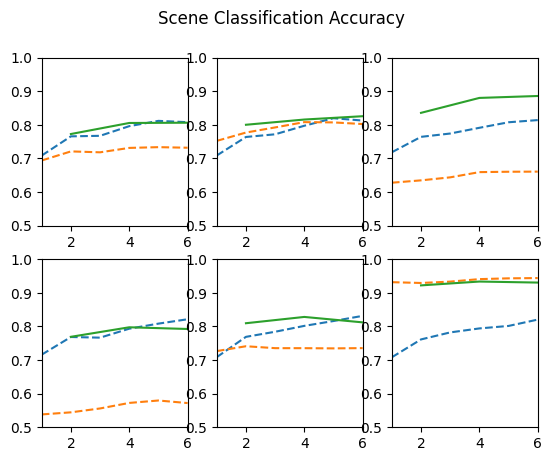

In [76]:
plot_idx = 1

n = np.arange(0,5,1)

plt.figure()
for col_idx, model in enumerate(['ResNet50','ViT-B/32','ViT-L/14']):
    for row_idx,desc in enumerate(['Basic','Detailed']):
        
        audio_mask = ((scene_recognition_results_df['Vision Backbone'] == model) &
                      (scene_recognition_results_df['Scene Description'] == desc) & 
                     (scene_recognition_results_df['Method'] == 'audio'))
        vision_mask = ((scene_recognition_results_df['Vision Backbone'] == model) &
                      (scene_recognition_results_df['Scene Description'] == desc) & 
                     (scene_recognition_results_df['Method'] == 'visual'))
        fused_mask = ((scene_recognition_results_df['Vision Backbone'] == model) &
                      (scene_recognition_results_df['Scene Description'] == desc) & 
                     (scene_recognition_results_df['Method'] == 'fused'))
        
        audio_data = scene_recognition_results_df[audio_mask]
        vision_data = scene_recognition_results_df[vision_mask]
        fused_data = scene_recognition_results_df[fused_mask]
                
        plt.subplot(2, 3, plot_idx)
        plt.plot(audio_data['Number of Updates'],audio_data['Accuracy'],linestyle='--')
        plt.plot(vision_data['Number of Updates'],vision_data['Accuracy'],linestyle='--')
        plt.plot(fused_data['Number of Updates'],fused_data['Accuracy'])
        plt.xlim((1,6))
        plt.ylim((.5,1.))

        
        plot_idx +=1
plt.suptitle('Scene Classification Accuracy')
plt.show()

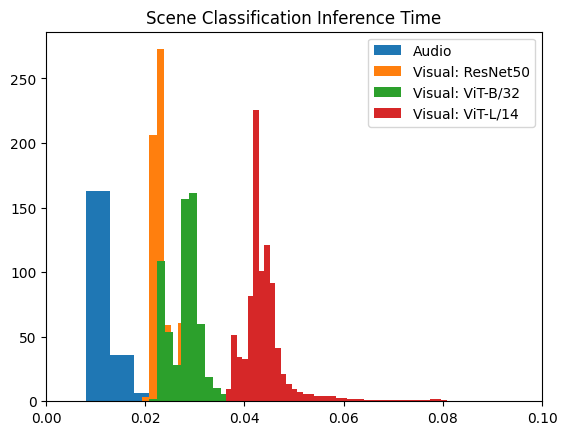

In [100]:
audio_inference_time_path = '../../results/exp0_obs_models/audio_scene_inference_times.json'
audio_inference_times = json.load(open(audio_inference_time_path))

rn50_basic_inference_time_path = '../../results/exp0_obs_models/overall/RN50_basic_description_inference_times.json'
rn50_detailed_inference_time_path = '../../results/exp0_obs_models/overall/RN50_detailed_description_inference_times.json'
rn50_basic_inference_times = json.load(open(rn50_basic_inference_time_path))
rn50_detailed_inference_times = json.load(open(rn50_detailed_inference_time_path))
rn50_inference_times = rn50_basic_inference_times['overall'][1:] + rn50_detailed_inference_times['overall'][1:]

vitb32_basic_inference_time_path = '../../results/exp0_obs_models/overall/ViT-B32_basic_description_inference_times.json'
vitb32_detailed_inference_time_path = '../../results/exp0_obs_models/overall/ViT-B32_detailed_description_inference_times.json'
vitb32_basic_inference_times = json.load(open(vitb32_basic_inference_time_path))
vitb32_detailed_inference_times = json.load(open(vitb32_detailed_inference_time_path))
vitb32_inference_times = vitb32_basic_inference_times['overall'][1:] + vitb32_detailed_inference_times['overall'][1:]

vitl14_basic_inference_time_path = '../../results/exp0_obs_models/overall/ViT-L14_basic_description_inference_times.json'
vitl14_detailed_inference_time_path = '../../results/exp0_obs_models/overall/ViT-L14_detailed_description_inference_times.json'
vitl14_basic_inference_times = json.load(open(vitl14_basic_inference_time_path))
vitl14_detailed_inference_times = json.load(open(vitl14_detailed_inference_time_path))
vitl14_inference_times = vitl14_basic_inference_times['overall'][1:] + vitl14_detailed_inference_times['overall'][1:]


plt.hist(audio_inference_times,bins=100,label='Audio',density=True)
plt.hist(rn50_inference_times,bins=100,label='Visual: ResNet50',density=True)
plt.hist(vitb32_inference_times,bins=100,label='Visual: ViT-B/32',density=True)
plt.hist(vitl14_inference_times,bins=100,label='Visual: ViT-L/14',density=True)
plt.title("Scene Classification Inference Time")
plt.xlim([0,.1])
plt.legend()
plt.show()

# Experiment 2: Hierarchical Commanding (Simultaneous Role & Command Classification)

In [133]:
filepath = '../../../../hierarchical_cmd_results_artag_only.csv'
hierarchical_cmd_results_df = pd.read_csv(filepath)

## Role Recognition

In [134]:
# ARTAG role accuracy
overall_artag_ped_true_pos_mask = ((hierarchical_cmd_results_df['role rec method']=='artag') & (hierarchical_cmd_results_df['role']=='pedestrian') & (hierarchical_cmd_results_df['estimated role']=='pedestrian'))
overall_artag_teammate_true_pos_mask = ((hierarchical_cmd_results_df['role rec method']=='artag') &(hierarchical_cmd_results_df['role']=='teammate') & (hierarchical_cmd_results_df['estimated role']=='robot-teammate'))
overall_artag_supervisor_true_pos_mask = ((hierarchical_cmd_results_df['role rec method']=='artag') &(hierarchical_cmd_results_df['role']=='supervisor') & (hierarchical_cmd_results_df['estimated role']=='robot-supervisor'))

overall_artag_role_estimates = len(hierarchical_cmd_results_df)
overall_artag_ped_true_pos = len(hierarchical_cmd_results_df[overall_artag_ped_true_pos_mask])
overall_artag_teammate_true_pos = len(hierarchical_cmd_results_df[overall_artag_teammate_true_pos_mask])
overall_artag_supervisor_true_pos = len(hierarchical_cmd_results_df[overall_artag_supervisor_true_pos_mask])
overall_artag_true_pos = overall_artag_ped_true_pos + overall_artag_teammate_true_pos + overall_artag_supervisor_true_pos

overall_artag_role_accuracy = float(overall_artag_true_pos/overall_artag_role_estimates)


campus_artag_ped_true_pos_mask = ((hierarchical_cmd_results_df['scene']=='campus') & (hierarchical_cmd_results_df['role rec method']=='artag') & (hierarchical_cmd_results_df['role']=='pedestrian') & (hierarchical_cmd_results_df['estimated role']=='pedestrian'))
campus_artag_teammate_true_pos_mask = ((hierarchical_cmd_results_df['scene']=='campus') & (hierarchical_cmd_results_df['role rec method']=='artag') &(hierarchical_cmd_results_df['role']=='teammate') & (hierarchical_cmd_results_df['estimated role']=='robot-teammate'))
campus_artag_supervisor_true_pos_mask = ((hierarchical_cmd_results_df['scene']=='campus') & (hierarchical_cmd_results_df['role rec method']=='artag') &(hierarchical_cmd_results_df['role']=='supervisor') & (hierarchical_cmd_results_df['estimated role']=='robot-supervisor'))

campus_artag_role_estimates = len(hierarchical_cmd_results_df[(hierarchical_cmd_results_df['scene']=='campus') & (hierarchical_cmd_results_df['role rec method']=='artag')])
campus_artag_ped_true_pos = len(hierarchical_cmd_results_df[campus_artag_ped_true_pos_mask])
campus_artag_teammate_true_pos = len(hierarchical_cmd_results_df[campus_artag_teammate_true_pos_mask])
campus_artag_supervisor_true_pos = len(hierarchical_cmd_results_df[campus_artag_supervisor_true_pos_mask])
campus_artag_true_pos = campus_artag_ped_true_pos + campus_artag_teammate_true_pos + campus_artag_supervisor_true_pos

campus_artag_role_accuracy = float(campus_artag_true_pos/campus_artag_role_estimates)


courtyard_artag_ped_true_pos_mask = ((hierarchical_cmd_results_df['scene']=='courtyard') & (hierarchical_cmd_results_df['role rec method']=='artag') & (hierarchical_cmd_results_df['role']=='pedestrian') & (hierarchical_cmd_results_df['estimated role']=='pedestrian'))
courtyard_artag_teammate_true_pos_mask = ((hierarchical_cmd_results_df['scene']=='courtyard') & (hierarchical_cmd_results_df['role rec method']=='artag') &(hierarchical_cmd_results_df['role']=='teammate') & (hierarchical_cmd_results_df['estimated role']=='robot-teammate'))
courtyard_artag_supervisor_true_pos_mask = ((hierarchical_cmd_results_df['scene']=='courtyard') & (hierarchical_cmd_results_df['role rec method']=='artag') &(hierarchical_cmd_results_df['role']=='supervisor') & (hierarchical_cmd_results_df['estimated role']=='robot-supervisor'))

courtyard_artag_role_estimates = len(hierarchical_cmd_results_df[(hierarchical_cmd_results_df['scene']=='courtyard') & (hierarchical_cmd_results_df['role rec method']=='artag')])
courtyard_artag_ped_true_pos = len(hierarchical_cmd_results_df[courtyard_artag_ped_true_pos_mask])
courtyard_artag_teammate_true_pos = len(hierarchical_cmd_results_df[courtyard_artag_teammate_true_pos_mask])
courtyard_artag_supervisor_true_pos = len(hierarchical_cmd_results_df[courtyard_artag_supervisor_true_pos_mask])
courtyard_artag_true_pos = courtyard_artag_ped_true_pos + courtyard_artag_teammate_true_pos + courtyard_artag_supervisor_true_pos

courtyard_artag_role_accuracy = float(courtyard_artag_true_pos/courtyard_artag_role_estimates)


lab_artag_ped_true_pos_mask = ((hierarchical_cmd_results_df['scene']=='lab') & (hierarchical_cmd_results_df['role rec method']=='artag') & (hierarchical_cmd_results_df['role']=='pedestrian') & (hierarchical_cmd_results_df['estimated role']=='pedestrian'))
lab_artag_teammate_true_pos_mask = ((hierarchical_cmd_results_df['scene']=='lab') & (hierarchical_cmd_results_df['role rec method']=='artag') &(hierarchical_cmd_results_df['role']=='teammate') & (hierarchical_cmd_results_df['estimated role']=='robot-teammate'))
lab_artag_supervisor_true_pos_mask = ((hierarchical_cmd_results_df['scene']=='lab') & (hierarchical_cmd_results_df['role rec method']=='artag') &(hierarchical_cmd_results_df['role']=='supervisor') & (hierarchical_cmd_results_df['estimated role']=='robot-supervisor'))

lab_artag_role_estimates = len(hierarchical_cmd_results_df[(hierarchical_cmd_results_df['scene']=='lab') & (hierarchical_cmd_results_df['role rec method']=='artag')])
lab_artag_ped_true_pos = len(hierarchical_cmd_results_df[lab_artag_ped_true_pos_mask])
lab_artag_teammate_true_pos = len(hierarchical_cmd_results_df[lab_artag_teammate_true_pos_mask])
lab_artag_supervisor_true_pos = len(hierarchical_cmd_results_df[lab_artag_supervisor_true_pos_mask])
lab_artag_true_pos = lab_artag_ped_true_pos + lab_artag_teammate_true_pos + lab_artag_supervisor_true_pos

lab_artag_role_accuracy = float(lab_artag_true_pos/lab_artag_role_estimates)


lobby_artag_ped_true_pos_mask = ((hierarchical_cmd_results_df['scene']=='lobby') & (hierarchical_cmd_results_df['role rec method']=='artag') & (hierarchical_cmd_results_df['role']=='pedestrian') & (hierarchical_cmd_results_df['estimated role']=='pedestrian'))
lobby_artag_teammate_true_pos_mask = ((hierarchical_cmd_results_df['scene']=='lobby') & (hierarchical_cmd_results_df['role rec method']=='artag') &(hierarchical_cmd_results_df['role']=='teammate') & (hierarchical_cmd_results_df['estimated role']=='robot-teammate'))
lobby_artag_supervisor_true_pos_mask = ((hierarchical_cmd_results_df['scene']=='lobby') & (hierarchical_cmd_results_df['role rec method']=='artag') &(hierarchical_cmd_results_df['role']=='supervisor') & (hierarchical_cmd_results_df['estimated role']=='robot-supervisor'))

lobby_artag_role_estimates = len(hierarchical_cmd_results_df[(hierarchical_cmd_results_df['scene']=='lobby') & (hierarchical_cmd_results_df['role rec method']=='artag')])
lobby_artag_ped_true_pos = len(hierarchical_cmd_results_df[lobby_artag_ped_true_pos_mask])
lobby_artag_teammate_true_pos = len(hierarchical_cmd_results_df[lobby_artag_teammate_true_pos_mask])
lobby_artag_supervisor_true_pos = len(hierarchical_cmd_results_df[lobby_artag_supervisor_true_pos_mask])
lobby_artag_true_pos = lobby_artag_ped_true_pos + lobby_artag_teammate_true_pos + lobby_artag_supervisor_true_pos

lobby_artag_role_accuracy = float(lobby_artag_true_pos/lobby_artag_role_estimates)

In [135]:
columns = ['AR Tag']
index = ['Campus','Courtyard','Lab','Lobby','Overall']

role_rec_results_df = pd.DataFrame(index=index,columns=columns)
role_rec_results_df.at['Campus','AR Tag'] = campus_artag_role_accuracy
role_rec_results_df.at['Courtyard','AR Tag'] = courtyard_artag_role_accuracy
role_rec_results_df.at['Lab','AR Tag'] = lab_artag_role_accuracy
role_rec_results_df.at['Lobby','AR Tag'] = lobby_artag_role_accuracy
role_rec_results_df.at['Overall','AR Tag'] = overall_artag_role_accuracy

In [136]:
role_rec_results_df

,AR Tag
Campus,0.962366
Courtyard,0.985413
Lab,0.936995
Lobby,0.985484
Overall,0.967688


## Command Recognition

In [137]:
hierarchical_cmd_results_df

,Unnamed: 0,config,scene,role,cmd_mode,cmd,role rec method,cmd rec method,stamp,object id,object class,estimated role,estimated command
0,0,config/exp2_cfgs/exp2_ar_role_ar_cmd.yaml,lab,supervisor,artag,move-in-reverse,artag,artag,0.000000e+00,NaN,NaN,NaN,NaN
1,1,config/exp2_cfgs/exp2_ar_role_ar_cmd.yaml,lab,supervisor,artag,move-in-reverse,artag,artag,1.720996e+09,0.0,person,robot-supervisor,move-in-reverse
2,2,config/exp2_cfgs/exp2_ar_role_ar_cmd.yaml,lab,supervisor,artag,move-in-reverse,artag,artag,1.720996e+09,0.0,person,robot-supervisor,move-in-reverse
3,3,config/exp2_cfgs/exp2_ar_role_ar_cmd.yaml,lab,supervisor,artag,move-in-reverse,artag,artag,1.720996e+09,0.0,person,robot-supervisor,move-in-reverse
4,4,config/exp2_cfgs/exp2_ar_role_ar_cmd.yaml,lab,supervisor,artag,move-in-reverse,artag,artag,1.720996e+09,0.0,person,robot-supervisor,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409,2409,config/exp2_cfgs/exp2_ar_role_ar_cmd.yaml,lobby,teammate,artag,attention,artag,artag,1.721415e+09,0.0,person,robot-teammate,none
2410,2410,config/exp2_cfgs/exp2_ar_role_ar_cmd.yaml,lobby,teammate,artag,attention,artag,artag,1.721415e+09,0.0,person,robot-teammate,none
2411,2411,config/exp2_cfgs/exp2_ar_role_ar_cmd.yaml,lobby,teammate,artag,attention,artag,artag,1.721415e+09,0.0,person,robot-teammate,none
2412,2412,config/exp2_cfgs/exp2_ar_role_ar_cmd.yaml,lobby,teammate,artag,attention,artag,artag,1.721415e+09,0.0,person,robot-teammate,none


In [190]:
# Helper functions
def count_recognized_commands(cmd_rec_mask):
    count=0
    last_state = False
    
    for cmd_rec in cmd_rec_mask:
        if ((cmd_rec == False) & (last_state == True)):
            count+=1

        last_state = cmd_rec

    return count

# Initialize df
rows = ['campus','courtyard','lab','lobby','overall']
cols = ['artag expected cmds','artag received commands','artag accuracy rate']
results_df = pd.DataFrame(np.zeros((len(rows),len(cols))),index=rows,columns=cols)


# Populate DF
for cmd_modality in ['artag']:
    for scene in ['campus','courtyard','lab','lobby']:
        for role in ['pedestrian','supervisor','teammate']:
            for actual_cmd in ['advance','attention','follow-me','halt','move-forward','move-in-reverse','rally']:

                cmd_series_mask = ((hierarchical_cmd_results_df['scene']==scene) & 
                                   (hierarchical_cmd_results_df['cmd']==actual_cmd) & 
                                   (hierarchical_cmd_results_df['role']==role) & 
                                   (hierarchical_cmd_results_df['cmd_mode']==cmd_modality))
        
                command_series_df = hierarchical_cmd_results_df[cmd_series_mask]

                cmd_recognized_mask = command_series_df['estimated command'] == actual_cmd

                results_df.loc[scene,'%s expected cmds' % cmd_modality] += round(len(command_series_df)/6)
                results_df.loc['overall','%s expected cmds' % cmd_modality] += round(len(command_series_df)/6)

                results_df.loc[scene,'%s received commands' % cmd_modality] += count_recognized_commands(cmd_recognized_mask)
                results_df.loc['overall','%s received commands' % cmd_modality] += count_recognized_commands(cmd_recognized_mask)

                # print(f"{scene}-{role}-{actual_cmd}")
                # print(count_recognized_commands(cmd_recognized_mask))
                # print(len(command_series_df))
                # print()

    results_df['%s accuracy rate' % cmd_modality] = results_df['%s received commands' % cmd_modality]/results_df['%s expected cmds' % cmd_modality]

In [191]:
results_df

,artag expected cmds,artag received commands,artag accuracy rate
campus,92.0,33.0,0.358696
courtyard,105.0,101.0,0.961905
lab,105.0,72.0,0.685714
lobby,105.0,84.0,0.800000
overall,407.0,290.0,0.712531
